# Domácí úkol č. 1 - Statistika

In [189]:
# import potřebných knihoven

import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


### Úkol č. 1 - Příprava dat 
1. Načtěte dataset 
2. Odstraňte mezery z názvů sloupců

In [190]:
data_new = pd.read_csv("adm_data.csv")
new_names = {
    "Serial No.":"No.",
    "GRE Score":"GRE", 
    "LOR ": "LOR",
    "TOEFL Score":"TOEFL", 
    "Chance of Admit ":"Chance",
    "University Rating":"Rating"}

data = data_new.rename(columns = new_names)
data.columns

Index(['No.', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

### Úkol č. 2 - Normálnost dat pro TOEFL skóre

1. Vypočítel průměr a medián pro TOEFL skóre

In [191]:
#průměr
průměr = data["TOEFL"].mean()
průměr 

107.41

In [192]:
#medián
median = data["TOEFL"].median()
median

107.0

In [193]:
#alternativní výpočet pro medián
median2 = np.quantile(data["TOEFL"], q = [0.50])
median2

array([107.])

2. Vypočítejte směrodatnou odchylku

In [194]:
sm_odch = data["TOEFL"].std()
sm_odch

6.069513777374126

3. Vytvořte histogram pro TOEFL + zobrazte křivku pravděpodobnostního rozdělení

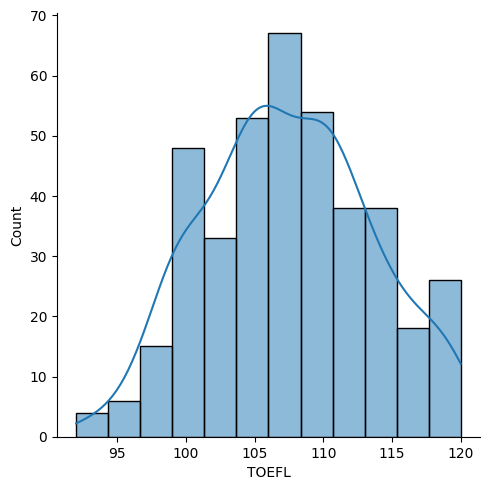

In [195]:
TOEFL_hist = sns.displot(data=data, x="TOEFL", kde=True)
TOEFL_hist

4. Otestujte, zda má TOEFL normální rozdělení (uvažujte obvyklou hladinu významnosti)

In [196]:
# H0: Data mají normální rozdělení 
# H1: Data nemaji normální rozdělení 

stats.normaltest(data["TOEFL"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

In [197]:
# Interpretace: 
# P-hodnota vyšla 0,004. Na hladině významnosti 5 % tedy nemůžeme zamítnout nulovou hypotézu. 
# Kloním se tedy k názoru, že data mají normální rozdělení. 

### Úkol č. 3 - Korelace

1. Vypočítejte korelaci mezi TOEFL skóre a GRE skóre

In [198]:
data.corr()

,No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


2. Okomentuje výsledek - je korelace silná / pozitivní atd? 

In [199]:
# Korelace mezi TOEFL skóre a GRE skóre jsou spolu vysoce korelované (0,836). 
# Je zde velmi silná pozitivní souvislost.

3. Vytvořte korelační graf (sns.regplot) pro vysvětlovanou proměnnou "šance na přijetí" a proměnnou, která je s ní nejvíce korelovaná.

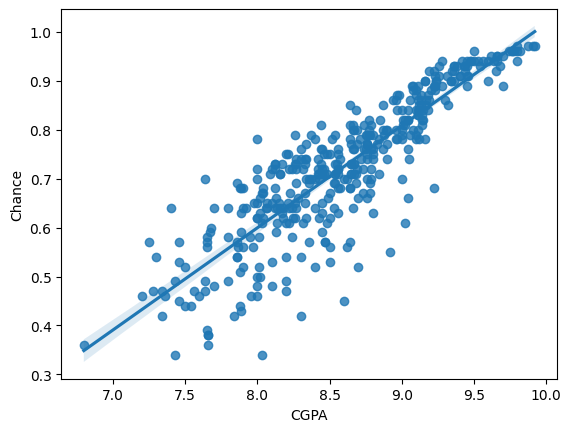

In [200]:
#šance na přijetí je nejvíce korelovaná s průměrnou známkou z bakalářského studia (CGPA)
g = sns.regplot (data = data, x = "CGPA", y = "Chance")

### Úkol č. 4 - Vysvětlovaná proměnná (šance na přijetí)

1. Vytvořte boxplot pro proměnnou "Chance"

<Axes: ylabel='Chance'>

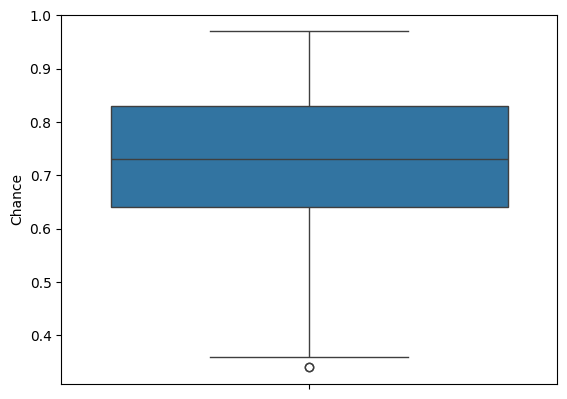

In [201]:
sns.boxplot(data, y = "Chance")

2. Odstraňte odlehlá pozorování

In [202]:
# Podle boxplot je taková hodnota v datasetu pouze jedna (ta nejnižší hodnota datasetu)

min = data["Chance"].min()
min

0.34

<Axes: ylabel='Chance'>

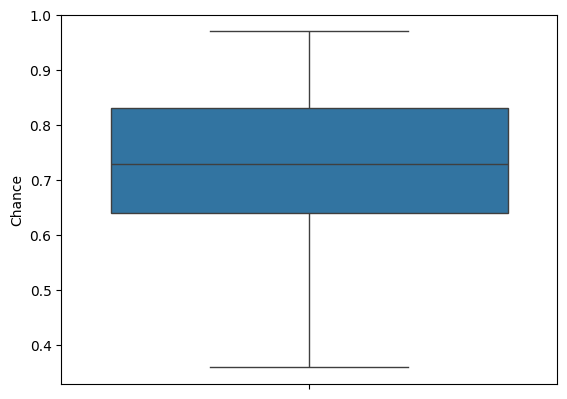

In [203]:
#odstraním minimum z datasetu a zkontroluji nový dataset pomocí boxplotu
data_cleaned = data.drop(data[data["Chance"] == min].index)
sns.boxplot(data_cleaned, y = "Chance")

### Úkol č. 5 - Lineární regrese 

1. Sestavte rovnici pro lineární regresi

In [206]:
# pozn.: V tomto konrkétním případě je problém, že mezi proměnnými navzájem existují významné korelaci. Nicméně v této úloze to nebudu řešit :) 
formula = "Chance ~ GRE + TOEFL + Rating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula = formula, data = data_cleaned)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Chance   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.9
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.78e-134
Time:                        22:22:26   Log-Likelihood:                 542.56
No. Observations:                 398   AIC:                            -1069.
Df Residuals:                     390   BIC:                            -1037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2107      0.123     -9.855      0.000      -1.452      -0.969
GRE            0.0017      0.001      2.843      0.005       0.001       0.003
TOEFL          0.0026      0.001      2.467      0.014       0.001       0.005
Rating         0.0054      0.005      1.147      0.252      -0.004       0.015
SOP           -0.0003      0.005     -0.063      0.950      -0.011       0.010
LOR            0.0210      0.005      3.861      0.000       0.010       0.032
CGPA           0.1190      0.012      9.920      0.000       0.095       0.143
Research       0.0237      0.008      3.040      0.003       0.008       0.039
==============================================================================
Omnibus:                       88.327   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.308
Skew:                          -1.164   Prob(JB):                     9.50e-41
Kurtosis:                       5.386   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Odhadněte parametry lineárního regresního modelu 

In [ ]:
"""
Intercept = -1,2594

GRE = 0,0017 
TOEFL = 0,0026
Rating = 0,0054
SOP = -0,0003
LOR = 0,0210
CGPA = 0,12
Research = 0,0237

"""

3. Interpretuje koeficienty modelu. Které koeficienty jsou statisticky významné? Které proměnné mají největší vliv na šanci na přijetí a proč?

In [ ]:
# H0: Koeficient je statisticky nevýznamný
# H1: Koeficient je statisticky významný 

# Na hladině významnosti 0,05 jsou významné tyto koeficienty: GRE, TOEFL, LOR, CGPA, Research)
# Úspěšnost přijetí nejvíce ovlivňuje průměr z bakalářského studia (CGPA), je statisticky významný a zároveň změna CGPA o jeden bod vyvolá nejvýznamnější změnu v šanci na přijetí.

4. Vyhodnoťte kvalitu fitu lineárního regresního modelu pomocí koeficientu determinace R^2 

In [ ]:
"""
Koefecient determina činní 0,8.
To znamená, že 80 % šance na přijetí lze vysvělit naším modelem.
"""

5. Spočítejte Cookovu vzdálenost pro jednotlivé body.

In [209]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "Chance ~ GRE + TOEFL + Rating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula = formula, data = data_cleaned)
results = mod.fit()
influence = OLSInfluence (results)
data_cleaned["Cook Distance"] = influence.cooks_distance[0]
data_cleaned.head()

,No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000383
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000811
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002403
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001627
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000098


6. Vytvořte histogram pro Cookovu vzdálenost. Je potřeba nějaké body odstranit, protože by ovlivňovali naši lineární regresi? 

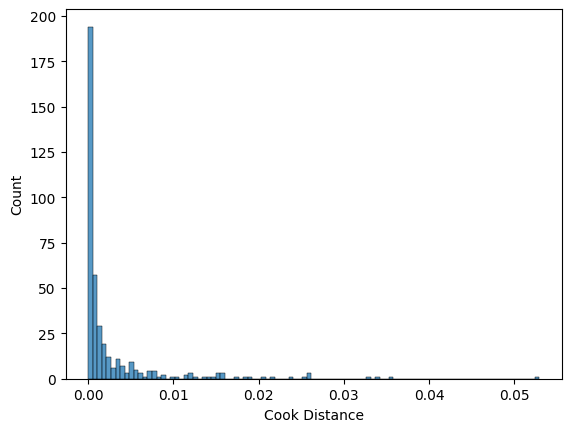

In [212]:
g = sns.histplot(data_cleaned, x = "Cook Distance")

In [ ]:
#Žádné body není potřeba odstranit, protože zde nejsou žádné body vyšší než 1. 